## <font color='blue'>Mini-Projeto 3 - Modelagem</font>
### <font color='blue'>Data Quality Report e Detecção de Fraudes em Transações Imobiliárias</font>

## Etapa 2 - Modelagem

- Existem diversas técnicas para análise e detecção de fraude.
- Aplicaremos aqui uma abordagem via aprendizado **não supervisionado** criando scores (pontuações) de fraude para cada transação imobiliária.
- Serão criados 2 scores com técnicas diferentes de Machine Learning e depois vamos unir os scores e apresentar o score final.
- A Engenharia de Atributos será parte fundamental do processo.
- Este trabalho tem nível intermediário de dificuldade.

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

## Carregando os Dados

In [4]:
# Carrega os dados
df = pd.read_csv('data/dataset.csv')

In [5]:
# Shape
df.shape

(1070994, 32)

In [6]:
# Visualiza amostra dos dados
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [7]:
# Colunas
df.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE'],
      dtype='object')

In [8]:
# Resumo
print("Linhas: ", df.shape[0])
print("Colunas: ", df.shape[1])
print("\nVariáveis: \n", df.columns.tolist())
print("\nValores Ausentes: \n" , df.isnull().sum())
print("\nValores Únicos: \n", df.nunique())

Linhas:  1070994
Colunas:  32

Variáveis: 
 ['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']

Valores Ausentes: 
 RECORD            0
BBLE              0
B                 0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VA

In [9]:
# Vamos trabalhar com uma cópia do dataframe
df_temp = df.copy()

## Limpeza e Transformação dos Dados

### Limpando Valores Ausentes da Variável ZIP

In [10]:
# Contagem de valores ausentes
df_temp['ZIP'].isna().sum()

29890

In [11]:
# Vamos calcular o valor da variável zip que aparece com maior frequência (calcular a moda)
# Se não houver nenhum valor de moda, substitua por 1
def calcula_moda(x):
    m = pd.Series.mode(x)
    if m.empty:
        x = np.array(range(1,11))
        return x[0]
    else:
        return m.values[0]

In [12]:
# Definindo a função de contagem para calcular a frequência do valor da moda de cada grupo (que vamos definir)
def contagem(x):
    return x.value_counts().head(1)

In [13]:
# Agrupando valores pela variável 'B' e 'BLOCK' e usando as duas funções acima para criar dataframe auxiliar
# Teremos o valor da moda da variável ZIP para cada grupo com registros com as variáveis B e Block
df_zip_group = df_temp.groupby(['B','BLOCK'])['ZIP'].agg(ZIP = calcula_moda, Count = contagem).reset_index()

In [14]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [15]:
# Para os grupos sem valor de moda, comparamos a frequência do grupo, um grupo abaixo e um grupo acima
# Inserimos o valor do ZIP do grupo com maior frequência
for i in range(len(df_zip_group)):
    if (df_zip_group.loc[i,'ZIP'] == 1):
        if df_zip_group.loc[i - 1,'Count'] > df_zip_group.loc[i + 1,'Count']:
            val = df_zip_group.loc[i - 1,'ZIP']
        else:
            val = df_zip_group.loc[i + 1,'ZIP']
        df_zip_group.loc[i,'ZIP'] = val

In [16]:
# Verificando os 25 primeiros registros
df_zip_group.head(25)

,B,BLOCK,ZIP,Count
0,1,1,10004.0,2
1,1,2,10004.0,2
2,1,3,10004.0,4
3,1,4,10004.0,53
4,1,5,10004.0,9
5,1,6,10004.0,2
6,1,7,10004.0,15
7,1,8,10004.0,6
8,1,9,10004.0,4
9,1,10,10004.0,8


In [17]:
# Definindo a função que preenche os registros com valor ZIP ausente por meio do dataframe auxiliar
def preenche_moda(x):
    if pd.isnull(x['ZIP']):
        return df_zip_group[(df_zip_group['B'] == x['B']) & (df_zip_group['BLOCK'] == x['BLOCK'])]['ZIP'].values[0]
    else:
        return x['ZIP']

In [18]:
# Usando a função para preencher os valores ZIP ausentes
df_temp['ZIP'] = df_temp.apply(preenche_moda, axis = 1)

In [19]:
# Verificando se há algum valor ZIP restante com valor NA
df_temp['ZIP'].isna().sum()

0

In [20]:
# Verificando manualmente uma das ocorrências para checar se a fórmula funcionou corretamente
df_temp[(df_temp['B']==1) & (df_temp['BLOCK']==36)]['ZIP']

6092    10005.0
6093    10005.0
6094    10005.0
6095    10005.0
Name: ZIP, dtype: float64

In [21]:
# Visualiza
df_temp.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [22]:
# Vamos salvar o dataframe resultante em disco
df_temp.to_csv('data/dataset_zip_limpo.csv')

In [23]:
df_temp['ZIP'] = df_temp['ZIP'].astype(int).astype(str)

In [24]:
# Cria cópia da estrutura do dataframe
df_temp2 = df_temp.copy()

In [25]:
# Carrega os dados do disco
df_temp2 = pd.read_csv('data/dataset_zip_limpo.csv')

### Limpando Valores Ausentes das Variáveis:

FULLVAL, AVLAND, AVTOT, BLDFRONT, BLDDEPTH, LTFRONT e LTDEPTH

In [26]:
# Substituindo valores vazios por valores NaN para garantir que a função fillna funcione nas etapas posteriores
df_temp2.replace(0, np.nan, inplace = True)

In [27]:
# Definindo a lista de variáveis a serem preenchidas
list_fill = ['FULLVAL', 'AVLAND', 'AVTOT', 'BLDFRONT', 'BLDDEPTH', 'LTFRONT', 'LTDEPTH']

In [28]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 13007
AVLAND --> Número de valores ausentes: 13009
AVTOT --> Número de valores ausentes: 13007
BLDFRONT --> Número de valores ausentes: 228815
BLDDEPTH --> Número de valores ausentes: 228853
LTFRONT --> Número de valores ausentes: 169108
LTDEPTH --> Número de valores ausentes: 170128


In [29]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e BLDGCL se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    filled_series = df_temp2.groupby(['ZIP', 'BLDGCL'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
    filled_series.index = df_temp2.index  # Redefinindo o índice para corresponder ao DataFrame original
    df_temp2[i] = filled_series


In [30]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 10294
AVLAND --> Número de valores ausentes: 10294
AVTOT --> Número de valores ausentes: 10294
BLDFRONT --> Número de valores ausentes: 75202
BLDDEPTH --> Número de valores ausentes: 75218
LTFRONT --> Número de valores ausentes: 16025
LTDEPTH --> Número de valores ausentes: 17764


In [31]:
# Preenchendo os registros vazios com a mediana do grupo ZIP e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    filled_series  = df_temp2.groupby(['ZIP','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
    filled_series.index = df_temp2.index  # Redefinindo o índice para corresponder ao DataFrame original
    df_temp2[i] = filled_series

In [32]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 3
AVLAND --> Número de valores ausentes: 3
AVTOT --> Número de valores ausentes: 3
BLDFRONT --> Número de valores ausentes: 62
BLDDEPTH --> Número de valores ausentes: 61
LTFRONT --> Número de valores ausentes: 26
LTDEPTH --> Número de valores ausentes: 26


In [33]:
# Preenchendo os registros ausentes com a mediana do grupo B e TAXCLASS se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    filled_series  = df_temp2.groupby(['B','TAXCLASS'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
    filled_series.index = df_temp2.index  # Redefinindo o índice para corresponder ao DataFrame original
    df_temp2[i] = filled_series

In [34]:
# Contando o número de valores NA para cada uma das variáveis
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 0
AVLAND --> Número de valores ausentes: 0
AVTOT --> Número de valores ausentes: 0
BLDFRONT --> Número de valores ausentes: 0
BLDDEPTH --> Número de valores ausentes: 0
LTFRONT --> Número de valores ausentes: 0
LTDEPTH --> Número de valores ausentes: 0


In [35]:
# Preenchendo os registros ausentes com a mediana do grupo B se o tamanho do grupo for maior ou igual a 5
for i in list_fill:
    filled_series = df_temp2.groupby(['B'])[i].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
    filled_series.index = df_temp2.index  # Redefinindo o índice para corresponder ao DataFrame original
    df_temp2[i] = filled_series

In [36]:
for i in list_fill:
    print(i, "--> Número de valores ausentes:", df_temp2[i].isna().sum())

FULLVAL --> Número de valores ausentes: 0
AVLAND --> Número de valores ausentes: 0
AVTOT --> Número de valores ausentes: 0
BLDFRONT --> Número de valores ausentes: 0
BLDDEPTH --> Número de valores ausentes: 0
LTFRONT --> Número de valores ausentes: 0
LTDEPTH --> Número de valores ausentes: 0


### Limpando Valores Ausentes da Variável STORIES 

In [37]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 56264


In [39]:
# Imputação da mediana com base nos grupos de ZIP e BLDGCL
filled_series = df_temp2.groupby(['ZIP','BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
filled_series.index = df_temp2.index
df_temp2['STORIES'] = filled_series

In [40]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 42102


In [41]:
# Imputação da mediana com base nos grupos de BLDGCL e STORIES
filled_series = df_temp2.groupby(['BLDGCL'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
filled_series.index = df_temp2.index
df_temp2['STORIES'] = filled_series

In [42]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 1


In [43]:
# Imputação da mediana com base nos grupos de TAXCLASS e STORIES
filled_series = df_temp2.groupby(['TAXCLASS'])['STORIES'].apply(lambda x: x.fillna(x.median()) if len(x) >= 5 else x)
filled_series.index = df_temp2.index
df_temp2['STORIES'] = filled_series

In [44]:
# Checa valores ausentes
print('STORIES', "--> Número de valores ausentes:", df_temp2['STORIES'].isna().sum())

STORIES --> Número de valores ausentes: 0


In [46]:
# Salvando resultado em disco
df_temp2.to_csv('data/dataset_variaveis_limpo.csv')

## Engenharia de Atributos

Vamos criar algumas variáveis a partir de operações com as variáveis existentes.

In [47]:
# Cópia do dataframe
df_proc = df_temp2.copy()

In [48]:
# LTFRONT * LTDEPTH
df_proc['AREA1'] = df_proc['LTFRONT'] * df_proc['LTDEPTH']

In [49]:
# Visualiza amostra
df_proc[['AREA1', 'LTFRONT', 'LTDEPTH']].head()

,AREA1,LTFRONT,LTDEPTH
0,19700.0,100.0,197.0
1,5247.0,53.0,99.0
2,32300.0,190.0,170.0
3,32300.0,190.0,170.0
4,32300.0,190.0,170.0


In [50]:
# BLDFRONT * BLDDEPTH
df_proc['AREA2'] = df_proc['BLDFRONT'] * df_proc['BLDDEPTH']

In [51]:
# Visualiza amostra
df_proc[['AREA2', 'BLDFRONT', 'BLDDEPTH']].head()

,AREA2,BLDFRONT,BLDDEPTH
0,19700.0,100.0,197.0
1,8800.0,100.0,88.0
2,12998.0,134.0,97.0
3,12998.0,134.0,97.0
4,12998.0,134.0,97.0


In [52]:
# AREA2 * STORIES
df_proc['AREA3'] = df_proc['AREA2'] * df_proc['STORIES']

In [53]:
# Visualiza amostra
df_proc[['AREA2', 'STORIES', 'AREA3']].head()

,AREA2,STORIES,AREA3
0,19700.0,2.0,39400.0
1,8800.0,1.0,8800.0
2,12998.0,2.0,25996.0
3,12998.0,2.0,25996.0
4,12998.0,2.0,25996.0


In [54]:
# Dividindo FULLVAL, AVLAND e AVTOT pelas variáveis recém criadas AREA1, AREA2 e AREA3 para gerar um índice
k = 1
for i in ['FULLVAL', 'AVLAND', 'AVTOT']:
    for j in ['AREA1', 'AREA2', 'AREA3']:
        indice_area = 'ind' + str(k)
        df_proc[indice_area] = df_proc[i] / df_proc[j]
        print(indice_area + ' é a combinação feita entre:', i, j)
        k += 1

ind1 é a combinação feita entre: FULLVAL AREA1
ind2 é a combinação feita entre: FULLVAL AREA2
ind3 é a combinação feita entre: FULLVAL AREA3
ind4 é a combinação feita entre: AVLAND AREA1
ind5 é a combinação feita entre: AVLAND AREA2
ind6 é a combinação feita entre: AVLAND AREA3
ind7 é a combinação feita entre: AVTOT AREA1
ind8 é a combinação feita entre: AVTOT AREA2
ind9 é a combinação feita entre: AVTOT AREA3


In [55]:
# Visualiza amostra
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,19700.0,19700.0,39400.0,23.601980,23.601980,11.800990,0.551624,0.551624,0.275812,10.620914,10.620914,5.310457
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,5247.0,8800.0,8800.0,706.068801,420.993523,420.993523,64.745569,38.604545,38.604545,317.730894,189.447045,189.447045
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,190.0,170.0,E,2.0,120905.0,17202.0,54407.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,134.0,97.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,3.743189,9.301816,4.650908,0.532570,1.323434,0.661717,1.684427,4.185798,2.092899
3,3.0,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,190.0,170.0,NaN,2.0,122129.0,17376.0,54958.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,134.0,97.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,3.781084,9.395984,4.697992,0.537957,1.336821,0.668411,1.701486,4.228189,2.114094
4,4.0,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,190.0,170.0,NaN,2.0,241675.0,34385.0,108754.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,134.0,97.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,7.482198,18.593245,9.296623,1.064551,2.645407,1.322703,3.366997,8.366980,4.183490


In [56]:
df_proc['ZIP'].dtype

dtype('float64')

In [57]:
# Converte o tipo da variável zip para string
df_proc['ZIP'] = df_proc['ZIP'].astype(int).astype(str)

In [58]:
df_proc['ZIP'].dtype

dtype('O')

In [59]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,19700.0,19700.0,39400.0,23.601980,23.601980,11.800990,0.551624,0.551624,0.275812,10.620914,10.620914,5.310457
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,5247.0,8800.0,8800.0,706.068801,420.993523,420.993523,64.745569,38.604545,38.604545,317.730894,189.447045,189.447045
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,190.0,170.0,E,2.0,120905.0,17202.0,54407.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,134.0,97.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,3.743189,9.301816,4.650908,0.532570,1.323434,0.661717,1.684427,4.185798,2.092899
3,3.0,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,190.0,170.0,NaN,2.0,122129.0,17376.0,54958.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,134.0,97.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,3.781084,9.395984,4.697992,0.537957,1.336821,0.668411,1.701486,4.228189,2.114094
4,4.0,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,190.0,170.0,NaN,2.0,241675.0,34385.0,108754.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,134.0,97.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,7.482198,18.593245,9.296623,1.064551,2.645407,1.322703,3.366997,8.366980,4.183490


In [60]:
# Lista das variáveis para o agrupamento abaixo
list_groupby = ['ZIP', 'TAXCLASS', 'B']

In [61]:
# Cria variáveis que representam as médias das áreas dos imóveis por grupo com base no índice criado

# Lista
ind_lista = ['ind' + str(i) for i in range(1,10)]

# Loop
for i in list_groupby:
    for j in ind_lista:
        name_col = 'media_' + str(j) + '_grupo_' + str(i)
        df_proc[name_col] = df_proc.groupby(i)[j].transform('mean')
        name_col_final = str(j) + '_' + name_col
        df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [62]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,19700.0,19700.0,39400.0,23.601980,23.601980,11.800990,0.551624,0.551624,0.275812,10.620914,10.620914,5.310457,321.846828,0.073333,454.754863,0.051900,221.699846,0.053230,24.175984,0.022817,31.064286,0.017758,14.5663,0.018935,82.022535,0.129488,104.897838,0.101250,47.76524,0.111178,271.306413,0.086994,695.433782,0.033939,305.752415,0.038597,13.383743,0.041216,79.894718,0.006904,35.693613,0.007727,32.601281,0.325782,110.669426,0.095970,49.704722,0.106840,361.171579,0.065348,571.440779,0.041303,263.474707,0.044790,34.390556,0.016040,74.575782,0.007397,34.8099,0.007923,93.893593,0.113116,152.107767,0.069825,70.571519,0.075249
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,5247.0,8800.0,8800.0,706.068801,420.993523,420.993523,64.745569,38.604545,38.604545,317.730894,189.447045,189.447045,321.846828,2.193804,454.754863,0.925759,221.699846,1.898935,24.175984,2.678094,31.064286,1.242731,14.5663,2.650264,82.022535,3.873702,104.897838,1.806015,47.76524,3.966212,271.306413,2.602477,695.433782,0.605368,305.752415,1.376910,13.383743,4.837628,79.894718,0.483193,35.693613,1.081553,32.601281,9.745964,110.669426,1.711828,49.704722,3.811450,361.171579,1.954940,571.440779,0.736723,263.474707,1.597852,34.390556,1.882655,74.575782,0.517655,34.8099,1.109011,93.893593,3.383946,152.107767,1.245479,70.571519,2.684469
2,2.0,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,190.0,170.0,E,2.0,120905.0,17202.0,54407.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,134.0,97.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,32300.0,12998.0,25996.0,3.743189,9.301816,4.650908,0.532570,1.323434,0.661717,1.684427,4.185798,2.092899,321.846828,0.011630,454.754863,0.020455,221.699846,0.020978,24.175984,0.022029,31.064286,0.042603,14.5663,0.045428,82.022535,0.020536,104.897838,0.039904,47.76524,0.043816,271.306413,0.013797,695.433782,0.013376,305.752415,0.015211,13.383743,0.039792,79.894718,0.016565,35.693613,0.018539,32.601281,0.051668,110.

In [63]:
# Shape
df_proc.shape

(1070994, 99)

In [64]:
# Média para todas as variáveis
for j in ind_lista:
    name_col = 'media_' + str(j) + '_grupo_All'
    df_proc[name_col] = df_proc[j].mean()
    name_col_final = str(j) + '_' + name_col
    df_proc[name_col_final] = df_proc[j] / df_proc[name_col]

In [65]:
# Shape
df_proc.shape

(1070994, 117)

In [66]:
# Visualiza
df_proc.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,AREA1,AREA2,AREA3,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,media_ind1_grupo_ZIP,ind1_media_ind1_grupo_ZIP,media_ind2_grupo_ZIP,ind2_media_ind2_grupo_ZIP,media_ind3_grupo_ZIP,ind3_media_ind3_grupo_ZIP,media_ind4_grupo_ZIP,ind4_media_ind4_grupo_ZIP,media_ind5_grupo_ZIP,ind5_media_ind5_grupo_ZIP,media_ind6_grupo_ZIP,ind6_media_ind6_grupo_ZIP,media_ind7_grupo_ZIP,ind7_media_ind7_grupo_ZIP,media_ind8_grupo_ZIP,ind8_media_ind8_grupo_ZIP,media_ind9_grupo_ZIP,ind9_media_ind9_grupo_ZIP,media_ind1_grupo_TAXCLASS,ind1_media_ind1_grupo_TAXCLASS,media_ind2_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,media_ind3_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,media_ind4_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,media_ind5_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,media_ind6_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,media_ind7_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,media_ind8_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,media_ind9_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,media_ind1_grupo_B,ind1_media_ind1_grupo_B,media_ind2_grupo_B,ind2_media_ind2_grupo_B,media_ind3_grupo_B,ind3_media_ind3_grupo_B,media_ind4_grupo_B,ind4_media_ind4_grupo_B,media_ind5_grupo_B,ind5_media_ind5_grupo_B,media_ind6_grupo_B,ind6_media_ind6_grupo_B,media_ind7_grupo_B,ind7_media_ind7_grupo_B,media_ind8_grupo_B,ind8_media_ind8_grupo_B,media_ind9_grupo_B,ind9_media_ind9_grupo_B,media_ind1_grupo_All,ind1_media_ind1_grupo_All,media_ind2_grupo_All,ind2_media_ind2_grupo_All,media_ind3_grupo_All,ind3_media_ind3_grupo_All,media_ind4_grupo_All,ind4_media_ind4_grupo_All,media_ind5_grupo_All,ind5_media_ind5_grupo_All,media_ind6_grupo_All,ind6_media_ind6_grupo_All,media_ind7_grupo_All,ind7_media_ind7_grupo_All,media_ind8_grupo_All,ind8_media_ind8_grupo_All,media_ind9_grupo_All,ind9_media_ind9_grupo_All
0,NaN,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,19700.0,19700.0,39400.0,23.601980,23.601980,11.800990,0.551624,0.551624,0.275812,10.620914,10.620914,5.310457,321.846828,0.073333,454.754863,0.051900,221.699846,0.053230,24.175984,0.022817,31.064286,0.017758,14.5663,0.018935,82.022535,0.129488,104.897838,0.101250,47.76524,0.111178,271.306413,0.086994,695.433782,0.033939,305.752415,0.038597,13.383743,0.041216,79.894718,0.006904,35.693613,0.007727,32.601281,0.325782,110.669426,0.095970,49.704722,0.106840,361.171579,0.065348,571.440779,0.041303,263.474707,0.044790,34.390556,0.016040,74.575782,0.007397,34.8099,0.007923,93.893593,0.113116,152.107767,0.069825,70.571519,0.075249,344.720735,0.068467,615.245459,0.038362,269.413409,0.043803,10.883897,0.050683,46.690514,0.011814,20.835212,0.013238,30.539253,0.347779,81.530304,0.130270,37.385765,0.142045
1,1.0,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,5247.0,8800.0,8800.0,706.068801,420.993523,420.993523,64.745569,38.604545,38.604545,317.730894,189.447045,189.447045,321.846828,2.193804,454.754863,0.925759,221.699846,1.898935,24.175984,2.678094,31.064286,1.242731,14.5663,2.650264,82.022535,3.873702,104.897838,1.806015,47.76524,3.966212,271.306413,2.602477,695.433782,0.605368,305.752415,1.376910,13.383743,4.837628,79.894718,0.483193,35.693613,1.081553,32.601281,9.745964,110.669426,1.711828,49.704722,3.811450,361.171579,1.954940,571.440779,0.736723,263.474707,1.597852,34.390556,1.882655,74.575782,0.517655,34.8099,1.109011,93.893593,3.383946,152.107767,1.245479,70.571519,2.684469,344.720735,2.048234,615.245459,0.684269,269.413409,1

In [67]:
# Lista para as colunas criadas
cols_created = []

In [68]:
# Loop pelas variáveis do group by
for i in list_groupby:
    for j in ind_lista:
        cols_created.append(j + '_media_' + j + '_grupo_' + i)

In [69]:
len(cols_created)

27

In [70]:
# Loop pelas colunas criadas
for j in ind_lista:
    cols_created.append(j + '_media_' + j + '_grupo_All')

In [71]:
len(cols_created)

36

In [72]:
# Colunas finais para os dados
cols = list(df.columns) + cols_created

In [73]:
# Dataframe final
df_final = df_proc[cols]

In [74]:
# Shape
df_final.shape

(1070994, 68)

In [75]:
# Colunas
df_final.columns

Index(['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL',
       'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES', 'FULLVAL', 'AVLAND',
       'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR', 'ZIP', 'EXMPTCL',
       'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2',
       'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE', 'ind1_media_ind1_grupo_ZIP',
       'ind2_media_ind2_grupo_ZIP', 'ind3_media_ind3_grupo_ZIP',
       'ind4_media_ind4_grupo_ZIP', 'ind5_media_ind5_grupo_ZIP',
       'ind6_media_ind6_grupo_ZIP', 'ind7_media_ind7_grupo_ZIP',
       'ind8_media_ind8_grupo_ZIP', 'ind9_media_ind9_grupo_ZIP',
       'ind1_media_ind1_grupo_TAXCLASS', 'ind2_media_ind2_grupo_TAXCLASS',
       'ind3_media_ind3_grupo_TAXCLASS', 'ind4_media_ind4_grupo_TAXCLASS',
       'ind5_media_ind5_grupo_TAXCLASS', 'ind6_media_ind6_grupo_TAXCLASS',
       'ind7_media_ind7_grupo_TAXCLASS', 'ind8_media_ind8_grupo_TAXCLASS',
       'ind9_media_ind9_grupo_TAXCLASS', 'ind1_media_ind1_grupo_

In [76]:
# Visualiza
df_final.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.073333,0.051900,0.053230,0.022817,0.017758,0.018935,0.129488,0.101250,0.111178,0.086994,0.033939,0.038597,0.041216,0.006904,0.007727,0.325782,0.095970,0.106840,0.065348,0.041303,0.044790,0.016040,0.007397,0.007923,0.113116,0.069825,0.075249,0.068467,0.038362,0.043803,0.050683,0.011814,0.013238,0.347779,0.130270,0.142045
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,2.193804,0.925759,1.898935,2.678094,1.242731,2.650264,3.873702,1.806015,3.966212,2.602477,0.605368,1.376910,4.837628,0.483193,1.081553,9.745964,1.711828,3.811450,1.954940,0.736723,1.597852,1.882655,0.517655,1.109011,3.383946,1.245479,2.684469,2.048234,0.684269,1.562630,5.948749,0.826818,1.852851,10.404016,2.323640,5.067358
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,190.0,170.0,E,2.0,120905.0,17202.0,54407.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,134.0,97.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.011630,0.020455,0.020978,0.022029,0.042603,0.045428,0.020536,0.039904,0.043816,0.013797,0.013376,0.015211,0.039792,0.016565,0.018539,0.051668,0.037823,0.042107,0.010364,0.016278,0.017652,0.015486,0.017746,0.019009,0.017940,0.027519,0.029656,0.010859,0.015119,0.017263,0.048932,0.028345,0.031760,0.055156,0.051340,0.055981
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,190.0,170.0,NaN,2.0,122129.0,17376.0,54958.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,134.0,97.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.011748,0.020662,0.021191,0.022252,0.043034,0.045887,0.020744,0.040308,0.044260,0.013937,0.013511,0.015365,0.040195,0.016732,0.018726,0.052191,0.038206,0.042533,0.010469,0.016443,0.017831,0.015643,0.017926,0.019202,0.018121,0.027797,0.029957,0.010969,0.015272,0.017438,0.049427,0.028632,0.032081,0.055715,0.051860,0.056548
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,190.0,170.0,NaN,2.0,241675.0,34385.0,108754.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,134.0,97.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,0.023248,0.040886,0.041933,0.044033,0.085159,0.090806,0.041050,0.079763,0.087584,0.027578,0.026736,0.030406,0.079541,0.033111,0.037057,0.103278,0.075603,0.084167,0.020716,0.032537,0.035285,0.030955,0.035473,0.037998,0.035860,0.055007,0.059280,0.021705,0.030221,0.034507,0.097810,0.056658,0.063484,0.110251,0.102624,0.111901


In [78]:
# Salva em disco
df_final.to_csv('data/dataset_final.csv')

In [79]:
# Carrega do disco
df_final = pd.read_csv('data/dataset_final.csv')

In [80]:
# Dataframe final para a modelagem
df = df_final.copy()

## Calculando o Score de Fraude 1 com PCA

Vamos criar o score de fraude usando PCA em escala Z. Essa é uma abordagem de aprendizado não supervisionado.

In [81]:
# Imports
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA

### Padronização das Variáveis

In [82]:
# Shape
df.shape

(1070994, 69)

In [83]:
# Colunas
df.columns

Index(['Unnamed: 0', 'RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT',
       'OWNER', 'BLDGCL', 'TAXCLASS', 'LTFRONT', 'LTDEPTH', 'EXT', 'STORIES',
       'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'EXCD1', 'STADDR',
       'ZIP', 'EXMPTCL', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2',
       'EXLAND2', 'EXTOT2', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE',
       'ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'i

In [84]:
# Tipos de dados
df.dtypes

Unnamed: 0                          int64
RECORD                              int64
BBLE                               object
B                                   int64
BLOCK                               int64
LOT                                 int64
EASEMENT                           object
OWNER                              object
BLDGCL                             object
TAXCLASS                           object
LTFRONT                           float64
LTDEPTH                           float64
EXT                                object
STORIES                           float64
FULLVAL                           float64
AVLAND                            float64
AVTOT                             float64
EXLAND                            float64
EXTOT                             float64
EXCD1                             float64
STADDR                             object
ZIP                                 int64
EXMPTCL                            object
BLDFRONT                          

In [85]:
# Busca as 36 últimas colunas (com as variáveis que nós criamos na Engenharia de Atributos)
df.iloc[:,-36:].columns

Index(['ind1_media_ind1_grupo_ZIP', 'ind2_media_ind2_grupo_ZIP',
       'ind3_media_ind3_grupo_ZIP', 'ind4_media_ind4_grupo_ZIP',
       'ind5_media_ind5_grupo_ZIP', 'ind6_media_ind6_grupo_ZIP',
       'ind7_media_ind7_grupo_ZIP', 'ind8_media_ind8_grupo_ZIP',
       'ind9_media_ind9_grupo_ZIP', 'ind1_media_ind1_grupo_TAXCLASS',
       'ind2_media_ind2_grupo_TAXCLASS', 'ind3_media_ind3_grupo_TAXCLASS',
       'ind4_media_ind4_grupo_TAXCLASS', 'ind5_media_ind5_grupo_TAXCLASS',
       'ind6_media_ind6_grupo_TAXCLASS', 'ind7_media_ind7_grupo_TAXCLASS',
       'ind8_media_ind8_grupo_TAXCLASS', 'ind9_media_ind9_grupo_TAXCLASS',
       'ind1_media_ind1_grupo_B', 'ind2_media_ind2_grupo_B',
       'ind3_media_ind3_grupo_B', 'ind4_media_ind4_grupo_B',
       'ind5_media_ind5_grupo_B', 'ind6_media_ind6_grupo_B',
       'ind7_media_ind7_grupo_B', 'ind8_media_ind8_grupo_B',
       'ind9_media_ind9_grupo_B', 'ind1_media_ind1_grupo_All',
       'ind2_media_ind2_grupo_All', 'ind3_media_ind3_grupo_All'

In [86]:
# Cria o objeto scaler
scaler = preprocessing.StandardScaler()

In [87]:
# Aplica o scaler às variáveis
arr_scaled = scaler.fit_transform(df.iloc[:,-36:])

In [88]:
# Cria o dataframe
df_scaled = pd.DataFrame(arr_scaled, columns = cols_created)

In [89]:
# Visualiza a amostra
df_scaled.head()

,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All
0,-0.139976,-0.101123,-0.096808,-0.107885,-0.048566,-0.047900,-0.104036,-0.052021,-0.050505,-0.046289,-0.066313,-0.049548,-0.062676,-0.012133,-0.011036,-0.048106,-0.009311,-0.008024,-0.113927,-0.060548,-0.042038,-0.042558,-0.011139,-0.011149,-0.074233,-0.012146,-0.009962,-0.042660,-0.061163,-0.047560,-0.057021,-0.011196,-0.010766,-0.054006,-0.009860,-0.008483
1,0.180328,-0.007918,0.091916,0.185268,0.012001,0.080574,0.343439,0.046653,0.168547,0.081245,-0.027088,0.019425,0.250866,-0.006314,0.000907,0.624026,0.007331,0.025258,0.116400,-0.016628,0.026311,0.038177,-0.005413,0.001225,0.199538,0.003205,0.018146,0.048005,-0.020082,0.027985,0.297249,-0.001962,0.009305,0.778689,0.015006,0.040217
2,-0.149297,-0.104477,-0.100105,-0.107972,-0.047337,-0.046607,-0.117057,-0.055572,-0.054332,-0.050000,-0.067724,-0.050754,-0.062769,-0.012015,-0.010916,-0.067664,-0.009910,-0.008606,-0.120629,-0.062128,-0.043233,-0.042582,-0.011023,-0.011025,-0.082199,-0.012699,-0.010453,-0.045299,-0.062642,-0.048880,-0.057126,-0.011009,-0.010564,-0.078237,-0.010755,-0.009334
3,-0.149279,-0.104455,-0.100084,-0.107947,-0.047316,-0.046584,-0.117032,-0.055548,-0.054307,-0.049993,-0.067715,-0.050746,-0.062743,-0.012013,-0.010914,-0.067626,-0.009906,-0.008602,-0.120616,-0.062118,-0.043225,-0.042575,-0.011021,-0.011022,-0.082184,-0.012695,-0.010450,-0.045294,-0.062632,-0.048871,-0.057097,-0.011005,-0.010560,-0.078191,-0.010749,-0.009329
4,-0.147542,-0.102298,-0.097963,-0.105542,-0.045233,-0.044391,-0.114605,-0.053265,-0.051845,-0.049301,-0.066807,-0.049970,-0.060170,-0.011813,-0.010710,-0.063981,-0.009520,-0.008228,-0.119367,-0.061101,-0.042457,-0.041913,-0.010824,-0.010811,-0.080699,-0.012340,-0.010134,-0.044802,-0.061681,-0.048022,-0.054191,-0.010688,-0.010218,-0.073675,-0.010173,-0.008781


### Aplicando PCA

In [90]:
# Cria e treina o modelo PCA
# Queremos encontrar o valor ideal de componentes principais
pca = PCA().fit(df_scaled)

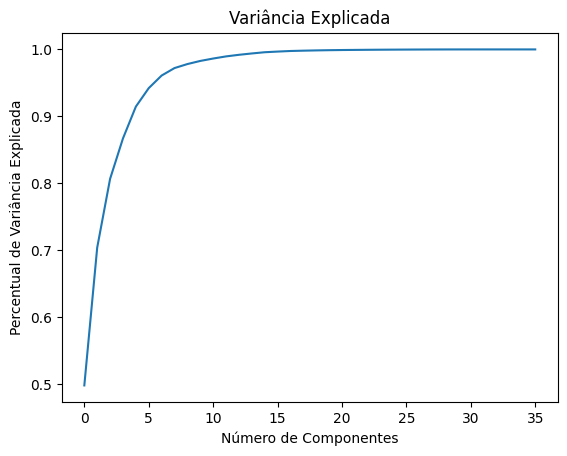

In [91]:
# Visualiza a Soma Cumulativa da Variância Explicada
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Percentual de Variância Explicada') 
plt.title('Variância Explicada')
plt.show()

In [92]:
# Pelo gráfico acima 10 componentes principais são suficentes. Usaremos esse valor.
pca = PCA(n_components = 10)

In [93]:
# Fit e transform do modelo pca
arr_pca = pca.fit_transform(df_scaled)

In [94]:
# Cria a lista colunas do PCA
cols_PCA = ['PCA' + str(i) for i in range(1,11)]
cols_PCA

['PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA6',
 'PCA7',
 'PCA8',
 'PCA9',
 'PCA10']

In [95]:
# Armazena os componentes em um dataframe
df_scaled_pca = pd.DataFrame(arr_pca, columns = cols_PCA)

In [96]:
# Visualiza amostra
df_scaled_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.236339,-0.196448,0.122429,0.009193,0.005962,-0.105570,-0.057624,-0.047712,0.022708,-0.014126
1,0.376634,0.861194,-0.038100,-0.099689,-0.080149,0.017176,-0.277527,0.007408,-0.097810,-0.462474
2,-0.247663,-0.220697,0.124851,0.020175,0.005826,-0.108428,-0.057193,-0.052403,0.022094,0.000329
3,-0.247597,-0.220640,0.124821,0.020173,0.005805,-0.108418,-0.057212,-0.052393,0.022089,0.000306
4,-0.241134,-0.215041,0.121867,0.019987,0.003714,-0.107414,-0.059100,-0.051486,0.021661,-0.001953


### Aplicação da Escala Z em Componentes PCA Padronizados

In [97]:
# Fit e transform nos dados
arr_pca_scaled_z = scaler.fit_transform(df_scaled_pca)

In [98]:
# Cria o dataframe
df_pca_scaled_z = pd.DataFrame(arr_pca_scaled_z, columns = cols_PCA)

In [99]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-0.055835,-0.072121,0.063662,0.006232,0.004557,-0.105839,-0.070001,-0.075268,0.048894,-0.034438
1,0.088980,0.316163,-0.019812,-0.067581,-0.061263,0.017220,-0.337137,0.011687,-0.210600,-1.127477
2,-0.058511,-0.081023,0.064922,0.013677,0.004453,-0.108704,-0.069477,-0.082668,0.047571,0.000802
3,-0.058495,-0.081002,0.064906,0.013675,0.004437,-0.108694,-0.069500,-0.082653,0.047562,0.000745
4,-0.056968,-0.078946,0.063370,0.013549,0.002839,-0.107687,-0.071794,-0.081221,0.046640,-0.004761


### Calculando o Fraud Score

In [100]:
# Loop para calcular o score por componente PCA
for i in range(1,11):
    col_name = 'score' + str(i)
    pca_col_name = 'PCA' + str(i)
    df_pca_scaled_z[col_name] = df_pca_scaled_z[pca_col_name] ** 2 

In [101]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10
0,-0.055835,-0.072121,0.063662,0.006232,0.004557,-0.105839,-0.070001,-0.075268,0.048894,-0.034438,0.003118,0.005201,0.004053,0.000039,0.000021,0.011202,0.004900,0.005665,0.002391,1.185968e-03
1,0.088980,0.316163,-0.019812,-0.067581,-0.061263,0.017220,-0.337137,0.011687,-0.210600,-1.127477,0.007917,0.099959,0.000393,0.004567,0.003753,0.000297,0.113661,0.000137,0.044352,1.271204e+00
2,-0.058511,-0.081023,0.064922,0.013677,0.004453,-0.108704,-0.069477,-0.082668,0.047571,0.000802,0.003424,0.006565,0.004215,0.000187,0.000020,0.011817,0.004827,0.006834,0.002263,6.425884e-07
3,-0.058495,-0.081002,0.064906,0.013675,0.004437,-0.108694,-0.069500,-0.082653,0.047562,0.000745,0.003422,0.006561,0.004213,0.000187,0.000020,0.011814,0.004830,0.006832,0.002262,5.553300e-07
4,-0.056968,-0.078946,0.063370,0.013549,0.002839,-0.107687,-0.071794,-0.081221,0.046640,-0.004761,0.003245,0.006232,0.004016,0.000184,0.000008,0.011597,0.005154,0.006597,0.002175,2.266315e-05


In [102]:
# Colunas
col_scores = ['score' + str(i) for i in range(1,11)]

In [103]:
# Calcula o score de fraude
df_pca_scaled_z['Fraud Score 1'] = df_pca_scaled_z[col_scores].sum(axis = 1) ** (1 / 2)

In [104]:
# Visualiza
df_pca_scaled_z.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,score1,score2,score3,score4,score5,score6,score7,score8,score9,score10,Fraud Score 1
0,-0.055835,-0.072121,0.063662,0.006232,0.004557,-0.105839,-0.070001,-0.075268,0.048894,-0.034438,0.003118,0.005201,0.004053,0.000039,0.000021,0.011202,0.004900,0.005665,0.002391,1.185968e-03,0.194358
1,0.088980,0.316163,-0.019812,-0.067581,-0.061263,0.017220,-0.337137,0.011687,-0.210600,-1.127477,0.007917,0.099959,0.000393,0.004567,0.003753,0.000297,0.113661,0.000137,0.044352,1.271204e+00,1.243479
2,-0.058511,-0.081023,0.064922,0.013677,0.004453,-0.108704,-0.069477,-0.082668,0.047571,0.000802,0.003424,0.006565,0.004215,0.000187,0.000020,0.011817,0.004827,0.006834,0.002263,6.425884e-07,0.200377
3,-0.058495,-0.081002,0.064906,0.013675,0.004437,-0.108694,-0.069500,-0.082653,0.047562,0.000745,0.003422,0.006561,0.004213,0.000187,0.000020,0.011814,0.004830,0.006832,0.002262,5.553300e-07,0.200353
4,-0.056968,-0.078946,0.063370,0.013549,0.002839,-0.107687,-0.071794,-0.081221,0.046640,-0.004761,0.003245,0.006232,0.004016,0.000184,0.000008,0.011597,0.005154,0.006597,0.002175,2.266315e-05,0.198068


In [105]:
# Dataframe final com o score
df_score1 = pd.merge(df, df_pca_scaled_z.iloc[:,-1], left_index = True, right_index = True)

In [106]:
# Shape
df_score1.shape

(1070994, 70)

In [107]:
# Visualiza
df_score1.head()

,Unnamed: 0,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE,ind1_media_ind1_grupo_ZIP,ind2_media_ind2_grupo_ZIP,ind3_media_ind3_grupo_ZIP,ind4_media_ind4_grupo_ZIP,ind5_media_ind5_grupo_ZIP,ind6_media_ind6_grupo_ZIP,ind7_media_ind7_grupo_ZIP,ind8_media_ind8_grupo_ZIP,ind9_media_ind9_grupo_ZIP,ind1_media_ind1_grupo_TAXCLASS,ind2_media_ind2_grupo_TAXCLASS,ind3_media_ind3_grupo_TAXCLASS,ind4_media_ind4_grupo_TAXCLASS,ind5_media_ind5_grupo_TAXCLASS,ind6_media_ind6_grupo_TAXCLASS,ind7_media_ind7_grupo_TAXCLASS,ind8_media_ind8_grupo_TAXCLASS,ind9_media_ind9_grupo_TAXCLASS,ind1_media_ind1_grupo_B,ind2_media_ind2_grupo_B,ind3_media_ind3_grupo_B,ind4_media_ind4_grupo_B,ind5_media_ind5_grupo_B,ind6_media_ind6_grupo_B,ind7_media_ind7_grupo_B,ind8_media_ind8_grupo_B,ind9_media_ind9_grupo_B,ind1_media_ind1_grupo_All,ind2_media_ind2_grupo_All,ind3_media_ind3_grupo_All,ind4_media_ind4_grupo_All,ind5_media_ind5_grupo_All,ind6_media_ind6_grupo_All,ind7_media_ind7_grupo_All,ind8_media_ind8_grupo_All,ind9_media_ind9_grupo_All,Fraud Score 1
0,0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,100.0,197.0,NaN,2.0,464959.0,10867.0,209232.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004,X3,100.0,197.0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR,0.073333,0.051900,0.053230,0.022817,0.017758,0.018935,0.129488,0.101250,0.111178,0.086994,0.033939,0.038597,0.041216,0.006904,0.007727,0.325782,0.095970,0.106840,0.065348,0.041303,0.044790,0.016040,0.007397,0.007923,0.113116,0.069825,0.075249,0.068467,0.038362,0.043803,0.050683,0.011814,0.013238,0.347779,0.130270,0.142045,0.194358
1,1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,53.0,99.0,NaN,1.0,3704743.0,339720.0,1667134.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004,X3,100.0,88.0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR,2.193804,0.925759,1.898935,2.678094,1.242731,2.650264,3.873702,1.806015,3.966212,2.602477,0.605368,1.376910,4.837628,0.483193,1.081553,9.745964,1.711828,3.811450,1.954940,0.736723,1.597852,1.882655,0.517655,1.109011,3.383946,1.245479,2.684469,2.048234,0.684269,1.562630,5.948749,0.826818,1.852851,10.404016,2.323640,5.067358,1.243479
2,2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,190.0,170.0,E,2.0,120905.0,17202.0,54407.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004,X1,134.0,97.0,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR,0.011630,0.020455,0.020978,0.022029,0.042603,0.045428,0.020536,0.039904,0.043816,0.013797,0.013376,0.015211,0.039792,0.016565,0.018539,0.051668,0.037823,0.042107,0.010364,0.016278,0.017652,0.015486,0.017746,0.019009,0.017940,0.027519,0.029656,0.010859,0.015119,0.017263,0.048932,0.028345,0.031760,0.055156,0.051340,0.055981,0.200377
3,3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,190.0,170.0,NaN,2.0,122129.0,17376.0,54958.0,15255000.0,17640000.0,2191.0,PIER 6,10004,X1,134.0,97.0,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR,0.011748,0.020662,0.021191,0.022252,0.043034,0.045887,0.020744,0.040308,0.044260,0.013937,0.013511,0.015365,0.040195,0.016732,0.018726,0.052191,0.038206,0.042533,0.010469,0.016443,0.017831,0.015643,0.017926,0.019202,0.018121,0.027797,0.029957,0.010969,0.015272,0.017438,0.049427,0.028632,0.032081,0.055715,0.051860,0.056548,0.200353
4,4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,190.0,170.0,NaN,2.0,241675.0,34385.0,108754.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004,X1,134.0,97.0,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR,0.023248,0.040886,0.041933,0.044033,0.085159,0.090806,0.041050,0.079763,0.087584,0.027578,0.026736,0.030406,0.079541,0.033111,0.037057,0.103278,0.075603,0.084167,0.020716,0.032537,0.035285,0.030955,0.035473,0.037998,0.035860,0.055007,0.059280,0.021705,0.030221,0.034507,0.097810,0.056658,0.063484,0.110251,0